# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**Tracey Moyston**

Place your academic honesty statement below. Here are some acceptable examples.

-   I worked alone on this assignment.




# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**



In [25]:
#Estimation of the molar volume of isopropanol if it is assumed to be in the ideal gas state 

# conditions for isopropanol: 

p= 10 #bar
t=200 #C
t=t+273.15 #K
r= 83.14 #cm3 bar/(mol K)

#for an ideal gas pv/rt =1 therefore volume becomes:
v= (r*t)/p

print(round(v,1),"cm^3/mol") #displays the volume to 1 decimal place with units 


3933.8 cm^3/mol


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



In [35]:
#defines a function 'volume' that accepts volumes as the variable and computes the function 

def volume (v):
    p= 10 #bar
    t=200 #C
    t=t+273.15 #K
    r= 83.14 #cm3 bar/(mol K)
    b= -388 #cm3/mol
    c= -26000 #cm6/mol2
    f_v=((p*v)/(r*t)) -1-(b/v)-(c/(v**2)) #function of volume to be compouted 
    return v,f_v # the function returns the input volume and the solution to the function 

#to evalutate the function a few sample volumes are input into the function 
vol1=20 #cm3/mol
print (volume(vol1)) #displays the volume and the solution to the function for the input volume 
vol2=300 #cm3/mol 
print (volume(vol2))
vol3 = 3933.8 #cm3/mol 
print (volume(vol3))

vol4=list(range(1,10,1)) # cm3/mol. evaluates the function using a list of volumes 
for i in range(0,len(vol4)): #for loop iterating over the length of the list of volumes 
    print (volume(vol4[i])) #evaluates the volume function for each volume in the list and displays it 

#finding volumes where the function is equal to zero 

vol5=list(range(1,4000,1)) #cm3/mol. creates a list of volumes from 1 to 4000(excluded) increasing by 1 each time 


for i in range(0,len(vol5)): #for loop iterating over the length of the list of volumes 
    if round(volume(vol5[i])[1],3)==0: #conditional statement - if the function value is 0 to 3 decimal places then 
                                       #it will display the volume and the function value 
        print (volume(vol5[i]))

#finding the actual roots of the function 
import sympy

v=sympy.Symbol('v') #from the sympy module it assigns v as a variable in the function to be solved 
f_v_roots=sympy.solve(volume(v)[1]) #solves for the roots of the function 
print(f_v_roots,'cm3/mol') #prints out the roots of the equation 
        


        
    

(20, 83.40508418249561)
(300, 0.6584849596564045)
(3933.8, 0.10032037357514012)
(1, 26387.000254209124)
(2, 6693.000508418249)
(3, 3017.2229848495963)
(4, 1721.001016836499)
(5, 1116.601271045624)
(6, 785.8904141436375)
(7, 585.042595790404)
(8, 453.75203367299827)
(9, 363.10105331422176)
(504, 0.00031842584835818644)
(3486, -0.0003851077535364832)
(3487, -0.0001640448291237765)
(3488, 5.7037452755850405e-05)
(3489, 0.0002781390751554918)
(3490, 0.0004992600211483501)
[-58.1626110339026 + 0.e-20*I, 504.189694624591 - 0.e-20*I, 3487.74201640931 + 0.e-20*I] cm3/mol


### Plot f(V) over a range where you can observe a zero



You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



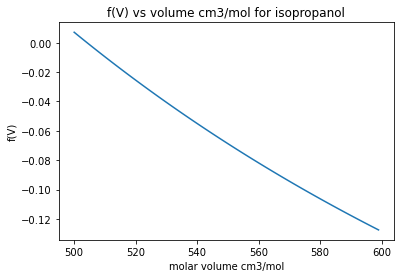

In [36]:
import matplotlib.pyplot as plt #imports the matplotlib package to be called as plt throughout the code 

# to observe a zero solution. From the solutions to the function above, a zero can be observed at 504.19

vols=list(range(500,600,1)) #creates a list of volumes from 500-599 cm3/mol to include the root. has step size of 1 

#assigns empty vectors to add in the volumes and the solutions to the function for each of these volumes 
volumes=[] 
f_vs=[]

    
for i in range(0,len(vols)): #for loop iterating over the length of the list of volumes
    x=volume(vols[i])
    volumes.append(x[0]) #adds the volume into the empty vector for each iteration of the loop 
    f_vs.append(x[1]) #adds the solution into the empty vector for each iteration of the loop 
    
     
plt.plot(volumes,f_vs) #plots the function versus the volume for volumes between 500 and 599 cm3/mol

#adds title and axes labels to the plot 
plt.title('f(V) vs volume cm3/mol for isopropanol')
plt.xlabel('molar volume cm3/mol')
plt.ylabel('f(V)')

plt.show()






State in words where the solution(s) are.

The solutions occur at -58.16 cm^3/mol, 504.19 cm^3/mol, 3487.74 cm^3/mol but since there cannot be a negative volume, the positive solutions are the possiblities for the volumes. 

### Express this in the form of a cubic polynomial in $V$



Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.

\begin{align}
0=\frac{P}{RT} V^3 -V^2 - BV - C\
\end{align}


# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heat from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [2]:
from scipy.integrate import odeint #importing the ode solver module 
import numpy

def odefunc(vari,t,sig,rho,beta): #defines a function to be used in the solution of the Lorenz equations. the function
                                  #accepts the parameters sigma, beta and rho, the variables x,y and z, and a time vector t
    x,y,z=vari #assigns the variables x,y and z to vari 
    #Lorenz equations:
    dxdt=sig*(y-x)
    dydt=(rho*x)-y-(x*z)
    dzdt=(-beta*z)+x*y
    return [dxdt, dydt, dzdt] #the function returns the solutions to the equations 

#defining the parameters sigma, beta and rho 
sig=10
rho=28
beta=8/3

#assigning the initial conditions for x,y and z to y0
y0=[1,1,1]
t= numpy.arange(0,1000.1,0.1).tolist() #sec. creates a list of times from 0-1000 sec increasing by 0.1 each time
results1=odeint(odefunc,y0,t,args=(sig,rho,beta))  #odeint to solve the odes - it acceots the function, the initial
#conditions, the time vector and additional arguments with the parameters and returns the solutions 




2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [9]:
y0_2=[1,1,0.9999] #different initial conditions with z=0.9999
results2=odeint(odefunc,y0_2,t,args=(sig,rho,beta))


3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

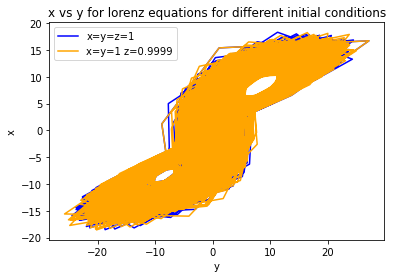

In [20]:
#creates empty vectors to store the x,y and z solutions independently for the two initial condtions 
vec_x=[] #set up for x=y=z=1
vec_y=[]
vec_z=[]

vec_x2=[] #set up for x=y=1 and z=0.9999
vec_y2=[]
vec_z2=[]
for i in range(0,len(results2)): #iterates over the length of the vector holding the results of the ode solver 
    vec_x.append(results1[i][0]) #adds the x,y and z values to their respective vectors for each initial condition
    vec_y.append(results1[i][1])
    vec_z.append(results1[i][2])
    vec_x2.append(results2[i][0])
    vec_y2.append(results2[i][1])
    vec_z2.append(results2[i][2])

#plots for x vs y for both initial conditions on the same plot assigning different colors to each condition     
plt.plot(vec_y,vec_x, color ='blue') 
plt.plot(vec_y2,vec_x2, color ='orange') 
plt.title('x vs y for lorenz equations for different initial conditions')
plt.xlabel('y')
plt.ylabel('x')
plt.legend(['x=y=z=1','x=y=1 z=0.9999'])

4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

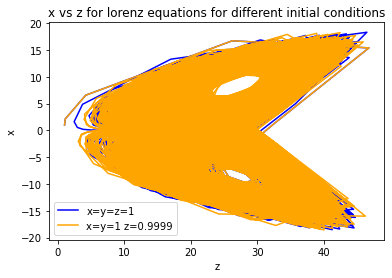

In [22]:
#plots for x vs z for both initial conditions on the same plot assigning different colors to each condition   
plt.plot(vec_z,vec_x, color ='blue') 
plt.plot(vec_z2,vec_x2, color ='orange') 
plt.title('x vs z for lorenz equations for different initial conditions')
plt.xlabel('z')
plt.ylabel('x')
plt.legend(['x=y=z=1','x=y=1 z=0.9999'])

5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

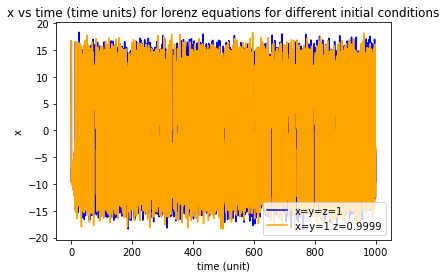

In [18]:
#plots for x vs time for both initial conditions on the same plot assigning different colors to each condition  
plt.plot(t,vec_x, color ='blue') 
plt.plot(t,vec_x2, color ='orange') 
plt.title('x vs time (time units) for lorenz equations for different initial conditions')
plt.xlabel('time (unit)')
plt.ylabel('x')
plt.legend(['x=y=z=1','x=y=1 z=0.9999'])

6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

seemingly rightshifted the x vs y graph and a bit the x vs z graph. Also there appeared to be a decrease in magitude of the x values with time 

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [4]:
#looking at covid data for florida 

file=open('florida.csv') #opens the csv file into the workspace for reading into
dat=file.readlines() #reads into the csv file and stores the lines in the array 'dat'


Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

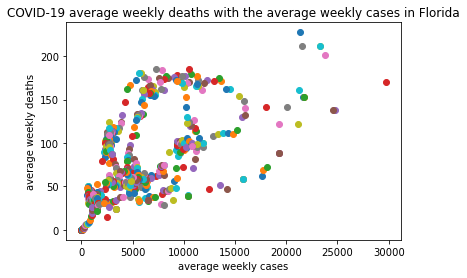

In [5]:
#plotting the average weekly cases with the average weekly deaths 


for i in range(1,len(dat)): #for loop that iterates through all the lines of the data file 
    tempdata=dat[i].split(',') #since in each line of a csv file the items are comma separated, it indexes into each line
                               #separates each item by the comma and adds them to a list 
    plt.scatter(float(tempdata[1]),float(tempdata[2])) #from the list above the second and third items contain the avg 
    #cases and avg deaths. The strings are converted to floats because of the decimals and a scatter plot is produced with
    #a different color for each dot (week)
                                                
    
#adds labels and titles to the plots 
plt.title('COVID-19 average weekly deaths with the average weekly cases in Florida')
plt.xlabel('average weekly cases')
plt.ylabel('average weekly deaths')



plt.show()




**From the plot there appears to be a general increase in the number of deaths as the average number of cases increase.**

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Right a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

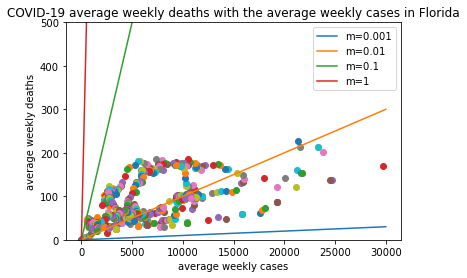

In [34]:



m=0.001 #starting slope value established outside of the for loop to be manipulated in the loop 
for i in range(0,4): #iterates over 0-3 to give 4 iterations of the loop 
    if m<10: #condition for the slope that if it is less than 10 then the lines will be plotted 
        x = numpy.linspace(0,30000,100) #creates an interval from 0-30000 with a step size of 100
        y = m*x #defines the line with an intercept of zero 
        plt.plot(x, y) #plots the line for the specific slope given 
        m=m*10 #assigns a new value to the slope increasing by an order of magnitude with each loop 


#copied from previous cell to plot the average cases and deaths on the same plot as the lines    
for i in range(1,len(dat)):
    tempdata=dat[i].split(',')
    plt.scatter(float(tempdata[1]),float(tempdata[2]))

    
#adds titels, labels and legends to the plot
plt.title('COVID-19 average weekly deaths with the average weekly cases in Florida')
plt.xlabel('average weekly cases')
plt.ylabel('average weekly deaths')
plt.legend(['m=0.001','m=0.01','m=0.1','m=1'])
plt.ylim(0,500) #sets the y axis to a limit of 500 to be able to see all of the data and the lines 
plt.show()





Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

The line with the slope 0.01 is the best fit for the data where best fit means the single line that best represents the general behavior/ relationship between the data 

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here:


**Upload your jupyter notebook to Canvas for grading. Thank you!

In [ ]:
https://github.com/traceymoyston/Che_Math.git